TEST: Empty Initialization -> Real Data Load -> Merge vs Replace

--- STEP 1: Create custom variable BEFORE loading any data ---
  empty_br: shape=(0,), size=0
  empty_bn: shape=(0,), size=0
  SUCCESS: Expression evaluated: shape=(0,), dtype=float64

--- STEP 2: Now load REAL data for br and bn ---
DEBUG: pyspedas module attributes: ['CDAWeb', 'HoverTime', 'MPLPlotter', 'OrderedDict', 'ace', 'add', 'add_across', 'akebono', 'analysis', 'annotate', 'avg_data', 'avg_res_data', 'barrel', 'cart2spc', 'cart_to_sphere', 'cdagui', 'cdagui_tools', 'cdf_to_tplot', 'check_downloaded_file', 'classify_null_type', 'clean_spikes', 'clip', 'cluster', 'cnofs', 'compare_versions', 'cotrans', 'cotrans_get_coord', 'cotrans_set_coord', 'cotrans_tools', 'count_traces', 'crop', 'csswe', 'ctime', 'dailynames', 'data_att_getters_setters', 'data_exists', 'data_quants', 'databar', 'de2', 'deflag', 'degap', 'del_data', 'deriv_data', 'derive', 'divide', 'download', 'download_file', 'download_ftp', 'dpwrspc', 'dsco

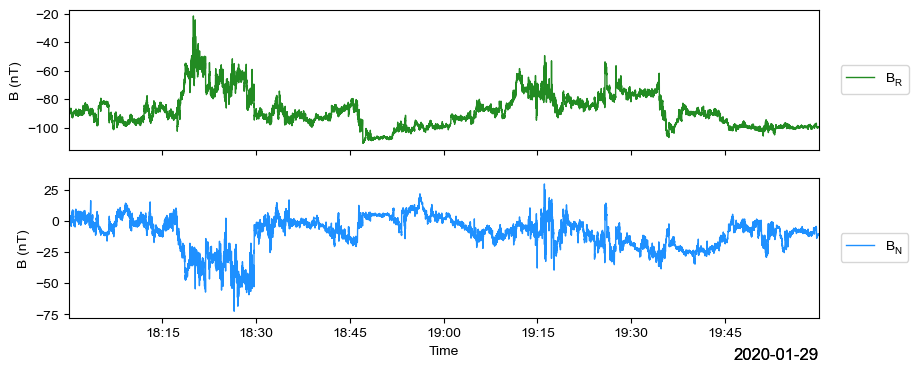

In [4]:
# Test: Does empty array initialization cause merge problems when real data loads?
import numpy as np
from plotbot.plot_manager import plot_manager as pm_cls
from plotbot.plot_config import plot_config as cfg_cls

print("="*70)
print("TEST: Empty Initialization -> Real Data Load -> Merge vs Replace")
print("="*70)

# Test parameters
trange = ['2020-01-29/18:00:00.000', '2020-01-29/20:00:00.000']

print("\n--- STEP 1: Create custom variable BEFORE loading any data ---")

# Create two empty plot_managers to simulate br and bn before data loads
cfg1 = cfg_cls(
    data_type='mag_RTN_4sa',
    class_name='mag_rtn_4sa',
    subclass_name='br',
    plot_type='time_series',
    datetime_array=None
)
cfg2 = cfg_cls(
    data_type='mag_RTN_4sa',
    class_name='mag_rtn_4sa',
    subclass_name='bn',
    plot_type='time_series',
    datetime_array=None
)

# Initialize with empty arrays (our recommended approach)
empty_br = pm_cls(np.array([], dtype=np.float64), plot_config=cfg1)
empty_bn = pm_cls(np.array([], dtype=np.float64), plot_config=cfg2)

print(f"  empty_br: shape={empty_br.shape}, size={empty_br.size}")
print(f"  empty_bn: shape={empty_bn.shape}, size={empty_bn.size}")

# Try the custom variable expression
try:
    phi_B_expression = np.degrees(np.arctan2(empty_br, empty_bn)) + 180
    print(f"  SUCCESS: Expression evaluated: shape={phi_B_expression.shape}, dtype={phi_B_expression.dtype}")
except Exception as e:
    print(f"  FAIL: Expression failed: {type(e).__name__}: {e}")
    phi_B_expression = None

print("\n--- STEP 2: Now load REAL data for br and bn ---")

# Load real MAG data
plotbot.ploptions.display_figure = False
plotbot.plotbot(trange, plotbot.mag_rtn_4sa.br, 1, plotbot.mag_rtn_4sa.bn, 2)

real_br = plotbot.mag_rtn_4sa.br
real_bn = plotbot.mag_rtn_4sa.bn

print(f"  real_br: shape={np.asarray(real_br).shape}")
print(f"  real_bn: shape={np.asarray(real_bn).shape}")

if hasattr(real_br, 'datetime_array') and real_br.datetime_array is not None:
    print(f"  real_br datetime_array: {len(real_br.datetime_array)} points")

print("\n--- STEP 3: Compute custom variable with REAL data ---")
try:
    phi_B_real = np.degrees(np.arctan2(real_br, real_bn)) + 180
    phi_B_real_array = np.asarray(phi_B_real)
    print(f"  SUCCESS: Real phi_B computed: shape={phi_B_real_array.shape}, dtype={phi_B_real_array.dtype}")
    print(f"     First 5 values: {phi_B_real_array[:5]}")
except Exception as e:
    print(f"  FAIL: {type(e).__name__}: {e}")
    phi_B_real_array = None

print("\n" + "="*70)
print("CONCLUSION:")
print("="*70)
if phi_B_expression is not None and phi_B_real_array is not None:
    print("SUCCESS: Empty initialization works!")
    print(f"   - Empty expression: shape={phi_B_expression.shape}")
    print(f"   - Real data result: shape={phi_B_real_array.shape}")
    print("\nThe empty array (shape=(0,)) does NOT contaminate real data.")
    print("Real data completely replaces the empty initialization.")
    print("\nRECOMMENDATION: Use np.array([], dtype=np.float64) for initialization")
else:
    print("FAIL: Something went wrong")